## EDA on Military Expenditure

 - You can download the dataset from this link:    https://www.kaggle.com/datasets/prasertk/military-expenditure-by-country-from-19702020

 - This dataset contains Military Expenditure of Whole World from year 1970 to 2020

## OBJECTIVE:
   1. Find the top 10 countries with highest total military spending.
   2. Find the top 10 countries with lowest total military spending.
   3. Find the top 10 countries with highest military spending in each decade.

In [2]:
library(dplyr)
library(tidyverse)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1     v readr   1.3.1
v tibble  2.1.1     v purrr   0.3.2
v tidyr   0.8.3     v stringr 1.4.0
v ggplot2 3.1.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [3]:
getwd()

[1] "d:/DOCS/R STUDIO/Military Expenditure"

In [4]:
d = read.csv('military expenditure.csv')  # for reading data from csv file

In [5]:
head(d,10)

country,iso3c,iso2c,year,Military.expenditure..current.USD.,Military.expenditure....of.general.government.expenditure.,Military.expenditure....of.GDP.,adminregion,incomeLevel
Afghanistan,AFG,AF,1970,2939586,NA,1.629606,South Asia,Low income
Afghanistan,AFG,AF,1971,NA,NA,NA,South Asia,Low income
Afghanistan,AFG,AF,1972,NA,NA,NA,South Asia,Low income
Afghanistan,AFG,AF,1973,3341272,NA,1.868910,South Asia,Low income
Afghanistan,AFG,AF,1974,3581366,NA,1.610825,South Asia,Low income
Afghanistan,AFG,AF,1975,4203665,NA,1.722066,South Asia,Low income
Afghanistan,AFG,AF,1976,5393251,NA,2.046087,South Asia,Low income
Afghanistan,AFG,AF,1977,6127288,NA,2.011475,South Asia,Low income
Afghanistan,AFG,AF,1978,NA,NA,NA,South Asia,Low income
Afghanistan,AFG,AF,1979,NA,NA,NA,South Asia,Low income


In [6]:
str(d)  # structure of data

'data.frame':	13566 obs. of  9 variables:
 $ country                                                   : Factor w/ 266 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ iso3c                                                     : Factor w/ 265 levels "","ABW","AFE",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ iso2c                                                     : Factor w/ 264 levels "","1A","1W","4E",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ year                                                      : int  1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 ...
 $ Military.expenditure..current.USD.                        : num  2939586 NA NA 3341272 3581366 ...
 $ Military.expenditure....of.general.government.expenditure.: num  NA NA NA NA NA NA NA NA NA NA ...
 $ Military.expenditure....of.GDP.                           : num  1.63 NA NA 1.87 1.61 ...
 $ adminregion                                               : Factor w/ 7 levels "","East Asia & Pacific (excluding high income)",..: 6 6 6 6 6 6 6 6 6 6 .

In [7]:
summary(d)

                        country          iso3c           iso2c      
 Afghanistan                :   51          :  102          :  102  
 Africa Eastern and Southern:   51   ABW    :   51   1A     :   51  
 Africa Western and Central :   51   AFE    :   51   1W     :   51  
 Albania                    :   51   AFG    :   51   4E     :   51  
 Algeria                    :   51   AFW    :   51   7E     :   51  
 American Samoa             :   51   AGO    :   51   (Other):13209  
 (Other)                    :13260   (Other):13209   NA's   :   51  
      year      Military.expenditure..current.USD.
 Min.   :1970   Min.   :0.000e+00                 
 1st Qu.:1982   1st Qu.:1.200e+08                 
 Median :1995   Median :1.148e+09                 
 Mean   :1995   Mean   :3.676e+10                 
 3rd Qu.:2008   3rd Qu.:8.533e+09                 
 Max.   :2020   Max.   :1.929e+12                 
                NA's   :4797                      
 Military.expenditure....of.general.gove

In [8]:
glimpse(d)

Observations: 13,566
Variables: 9
$ country                                                    <fct> Afghanis...
$ iso3c                                                      <fct> AFG, AFG...
$ iso2c                                                      <fct> AF, AF, ...
$ year                                                       <int> 1970, 19...
$ Military.expenditure..current.USD.                         <dbl> 2939586,...
$ Military.expenditure....of.general.government.expenditure. <dbl> NA, NA, ...
$ Military.expenditure....of.GDP.                            <dbl> 1.629606...
$ adminregion                                                <fct> South As...
$ incomeLevel                                                <fct> Low inco...


In [9]:
sample_n(d,5)

country,iso3c,iso2c,year,Military.expenditure..current.USD.,Military.expenditure....of.general.government.expenditure.,Military.expenditure....of.GDP.,adminregion,incomeLevel
IDA total,IDA,XG,1994,13383991486,NA,3.3401681,,Aggregates
Barbados,BRB,BB,2011,NA,NA,NA,,High income
Brunei Darussalam,BRN,BN,1972,NA,NA,NA,,High income
Luxembourg,LUX,LU,2012,237503050,0.949395,0.4282375,,High income
Georgia,GEO,GE,2017,321136645,7.138158,1.9697430,Europe & Central Asia (excluding high income),Upper middle income


In [10]:
head(sample_frac(d,0.2))

country,iso3c,iso2c,year,Military.expenditure..current.USD.,Military.expenditure....of.general.government.expenditure.,Military.expenditure....of.GDP.,adminregion,incomeLevel
Bahrain,BHR,BH,1988,2.074468e+08,NA,5.6030458,,High income
Liechtenstein,LIE,LI,1975,NA,NA,NA,,High income
Post-demographic dividend,PST,V4,2020,1.225464e+12,4.906157,2.5307636,,Aggregates
"Micronesia, Fed. Sts.",FSM,FM,2008,NA,NA,NA,East Asia & Pacific (excluding high income),Lower middle income
Mexico,MEX,MX,1998,2.263223e+09,2.084317,0.4504505,Latin America & Caribbean (excluding high income),Upper middle income
Chad,TCD,TD,1999,2.095180e+07,7.215532,1.3652238,Sub-Saharan Africa (excluding high income),Low income


In [11]:
head(distinct(d))

country,iso3c,iso2c,year,Military.expenditure..current.USD.,Military.expenditure....of.general.government.expenditure.,Military.expenditure....of.GDP.,adminregion,incomeLevel
Afghanistan,AFG,AF,1970,2939586,NA,1.629606,South Asia,Low income
Afghanistan,AFG,AF,1971,NA,NA,NA,South Asia,Low income
Afghanistan,AFG,AF,1972,NA,NA,NA,South Asia,Low income
Afghanistan,AFG,AF,1973,3341272,NA,1.868910,South Asia,Low income
Afghanistan,AFG,AF,1974,3581366,NA,1.610825,South Asia,Low income
Afghanistan,AFG,AF,1975,4203665,NA,1.722066,South Asia,Low income


In [12]:
length(distinct(d))

[1] 9

In [13]:
dim(d)

[1] 13566     9

In [14]:
dim(distinct(d))  # this proves no duplicates

[1] 13566     9

In [15]:
head(d)

country,iso3c,iso2c,year,Military.expenditure..current.USD.,Military.expenditure....of.general.government.expenditure.,Military.expenditure....of.GDP.,adminregion,incomeLevel
Afghanistan,AFG,AF,1970,2939586,NA,1.629606,South Asia,Low income
Afghanistan,AFG,AF,1971,NA,NA,NA,South Asia,Low income
Afghanistan,AFG,AF,1972,NA,NA,NA,South Asia,Low income
Afghanistan,AFG,AF,1973,3341272,NA,1.868910,South Asia,Low income
Afghanistan,AFG,AF,1974,3581366,NA,1.610825,South Asia,Low income
Afghanistan,AFG,AF,1975,4203665,NA,1.722066,South Asia,Low income


### Dropping some unnecessary columns

In [16]:
d = select(d, -iso3c, -iso2c, -Military.expenditure....of.general.government.expenditure.,-Military.expenditure....of.GDP. )
head(d)

country,year,Military.expenditure..current.USD.,adminregion,incomeLevel
Afghanistan,1970,2939586,South Asia,Low income
Afghanistan,1971,NA,South Asia,Low income
Afghanistan,1972,NA,South Asia,Low income
Afghanistan,1973,3341272,South Asia,Low income
Afghanistan,1974,3581366,South Asia,Low income
Afghanistan,1975,4203665,South Asia,Low income


### Grouping Data Based on Country

In [17]:
total_expenditure_of_each_country = aggregate(Military.expenditure..current.USD. ~ country, d, sum)
head(total_expenditure_of_each_country)

country,Military.expenditure..current.USD.
Afghanistan,3745003521
Africa Eastern and Southern,385573473388
Africa Western and Central,140254858738
Albania,3469019068
Algeria,161646507209
Angola,72581114339


### Arranging data in ascending order

In [18]:
x =  arrange(total_expenditure_of_each_country, Military.expenditure..current.USD.)
head(x)

country,Military.expenditure..current.USD.
Costa Rica,0
Iceland,0
Haiti,17802968
"Gambia, The",182344841
Cabo Verde,232528838
Guinea-Bissau,339454606


### Arranging data in descending order

In [19]:
y =  arrange(total_expenditure_of_each_country, -Military.expenditure..current.USD.)
head(y, 10)

country,Military.expenditure..current.USD.
World,4.169373e+13
High income,3.495713e+13
OECD members,3.320718e+13
Post-demographic dividend,3.181072e+13
North America,1.971774e+13
United States,1.916477e+13
IDA & IBRD total,9.230720e+12
Low & middle income,8.818343e+12
Middle income,8.644322e+12
IBRD only,8.525905e+12


### Dropping all rows which are not country

In [20]:
y1 = y[!(y$country == 'World' | y$country == 'High income' | y$country == 'OECD members' | y$country == 'Post-demographic dividend' |
y$country == 'North America' | y$country == 'IDA & IBRD total' | y$country == 'Low & middle income' | y$country == 'Middle income' | 
y$country == 'IBRD only' |  y$country == 'Europe & Central Asia' | y$country == 'European Union' | y$country == 'East Asia & Pacific' |
y$country == 'Late-demographic dividend' | y$country == 'Upper middle income' | y$country == 'Euro area' | y$country == 'Early-demographic dividend' |
y$country == 'Middle East & North Africa' | y$country == 'East Asia & Pacific (excluding high income)' | 
y$country == 'East Asia & Pacific (IDA & IBRD countries)' | y$country == 'Lower middle income' | 
y$country == 'Arab World' | y$country == 'Europe & Central Asia (IDA & IBRD countries)' | 
y$country =='Europe & Central Asia (excluding high income)' | y$country == 'Latin America & Caribbean' | 
y$country == 'Latin America & the Caribbean (IDA & IBRD countries)' | y$country == 'South Asia' |
y$country == 'South Asia (IDA & IBRD)' | y$country == 'Latin America & Caribbean (excluding high income)' |
y$country == 'Middle East & North Africa (excluding high income)' | y$country == 'Middle East & North Africa (IDA & IBRD countries)' |
y$country == 'IDA total' | y$country == 'Fragile and conflict affected situations' | 
y$country == 'Sub-Saharan Africa' | y$country == 'Sub-Saharan Africa (IDA & IBRD countries)' |
y$country == 'Sub-Saharan Africa (excluding high income)' | y$country == 'IDA only' | y$country == 'Pre-demographic dividend' |
 y$country == 'Africa Eastern and Southern' | y$country == 'Least developed countries: UN classification' |
y$country == 'Central Europe and the Baltics' | y$country == 'IDA blend' | y$country == 'Low income' |
y$country == 'Heavily indebted poor countries (HIPC)' | y$country == 'Africa Western and Central' |
y$country == 'Small states' | y$country == 'Other small states') ,]

head(y1, 10)    # dropping all rows which are not countries

,country,Military.expenditure..current.USD.
6,United States,1.916477e+13
22,China,2.680075e+12
24,United Kingdom,2.066502e+12
27,France,1.672982e+12
28,Japan,1.599862e+12
29,Germany,1.571645e+12
32,Saudi Arabia,1.366144e+12
38,Russian Federation,1.142354e+12
39,India,1.064878e+12
40,Italy,9.435370e+11


### Removing the index column

In [21]:
row.names(y1) = NULL  # for removing index
head(y1)

country,Military.expenditure..current.USD.
United States,1.916477e+13
China,2.680075e+12
United Kingdom,2.066502e+12
France,1.672982e+12
Japan,1.599862e+12
Germany,1.571645e+12


### Total military expenditure of the whole world

In [22]:
sum(y1$Military.expenditure..current.USD.)  # total expenditure of whole world

[1] 4.437241e+13

### Top 10 countries with highest military spending

In [23]:
highest_military_spending = head(y1,10) # top 10 countries with highest military spending
highest_military_spending

country,Military.expenditure..current.USD.
United States,1.916477e+13
China,2.680075e+12
United Kingdom,2.066502e+12
France,1.672982e+12
Japan,1.599862e+12
Germany,1.571645e+12
Saudi Arabia,1.366144e+12
Russian Federation,1.142354e+12
India,1.064878e+12
Italy,9.435370e+11


### Top 10 countries with lowest military spending

In [24]:
lowest_military_spending = tail(y1,10) # top 10 countries with lowest military spending
lowest_military_spending

,country,Military.expenditure..current.USD.
159,Seychelles,507377670
160,Mauritius,487969385
161,Timor-Leste,432900000
162,Belize,407204875
163,Guinea-Bissau,339454606
164,Cabo Verde,232528838
165,"Gambia, The",182344841
166,Haiti,17802968
167,Costa Rica,0
168,Iceland,0


### Plotting top 10 countries with highest military spending

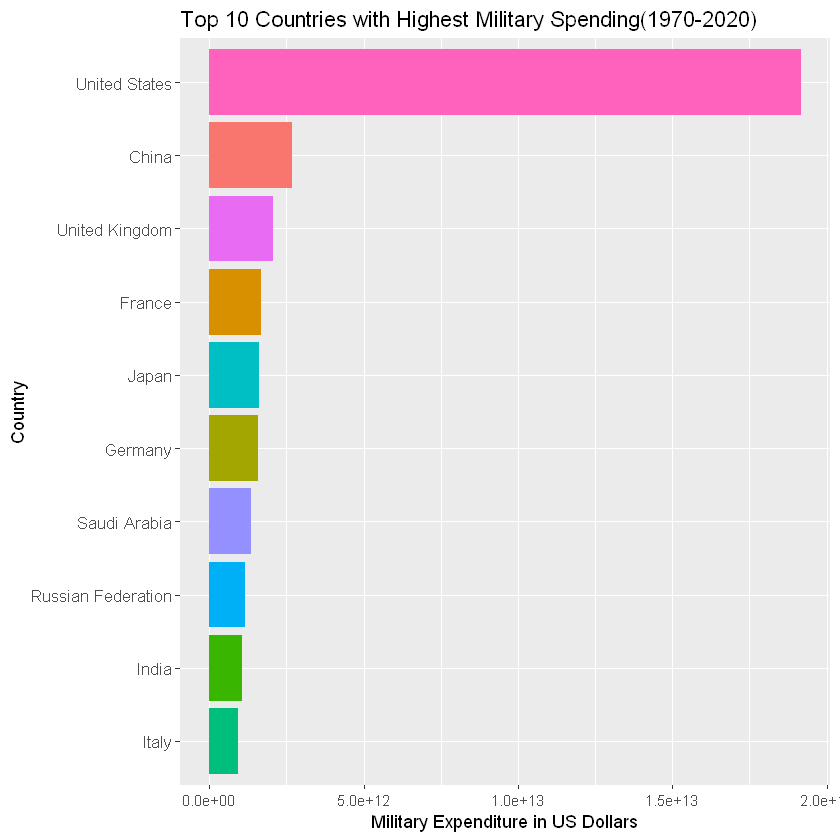

In [25]:
highest_expenditure_plot  = ggplot(highest_military_spending, 
aes(x= reorder(country, Military.expenditure..current.USD. ) , 
y=Military.expenditure..current.USD., fill = country)) +
geom_col()+ ggtitle('Top 10 Countries with Highest Military Spending(1970-2020)') + coord_flip() + 
theme(legend.position = 'None', axis.text.y = element_text(size = 10))

highest_expenditure_plot.labs = highest_expenditure_plot + labs(title = "Top 10 Countries with Highest Military Spending(1970-2020)",
 x = "Country", y = "Military Expenditure in US Dollars")

highest_expenditure_plot.labs

### Plotting top 10 countries with lowest military spending

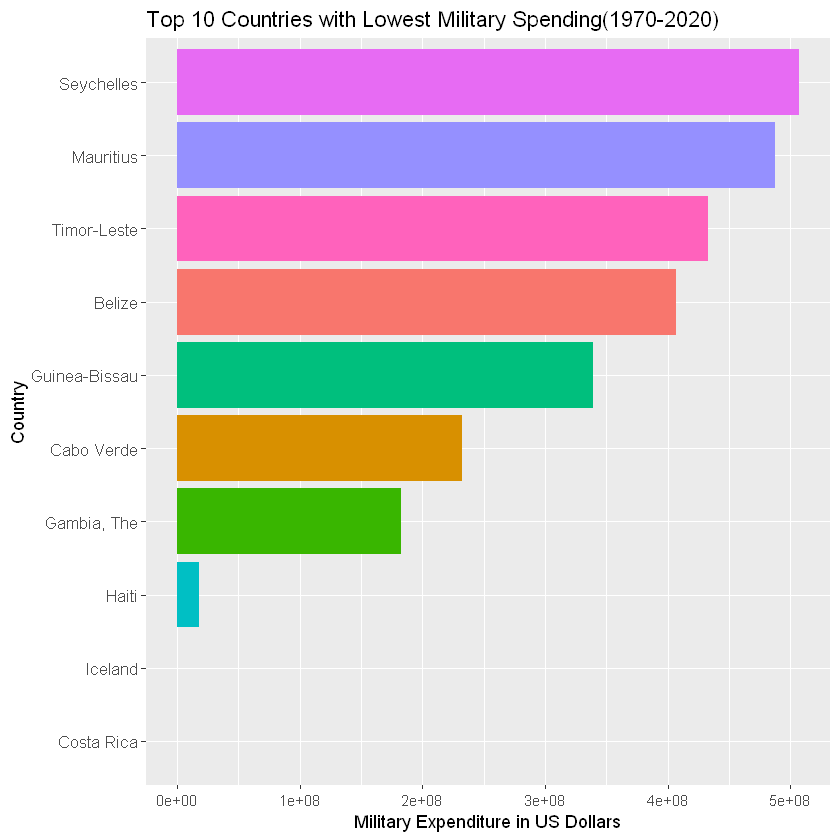

In [26]:
lowest_expenditure_plot  = ggplot(lowest_military_spending, aes(x= reorder(country, Military.expenditure..current.USD. ) , y=Military.expenditure..current.USD., fill = country)) +
geom_col()+ ggtitle('Top 10 Countries with Lowest Military Spending(1970-2020)') + coord_flip() + 
theme(legend.position = 'None', axis.text.y = element_text(size = 10))


lowest_expenditure_plot.labs = lowest_expenditure_plot + labs(title = "Top 10 Countries with Lowest Military Spending(1970-2020)", x = "Country", y = "Military Expenditure in US Dollars")
lowest_expenditure_plot.labs

### Plotting the same above charts in Pie Chart

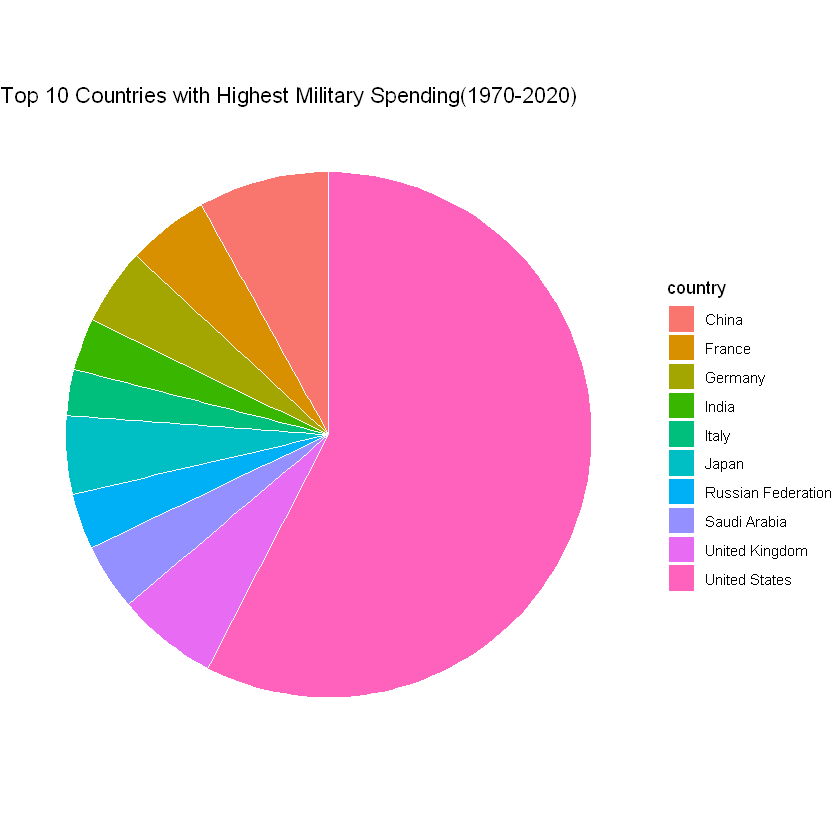

In [27]:
# Basic piechart
H_Plot= ggplot(highest_military_spending, aes(x="", y=Military.expenditure..current.USD., fill=country)) +
  geom_bar(stat="identity", width=1, color="white") +
  coord_polar("y", start=0) +
  theme_void() # remove background, grid, numeric labels
  
         
H_Plot.labs = H_Plot + labs(title = "Top 10 Countries with Highest Military Spending(1970-2020)")
H_Plot.labs

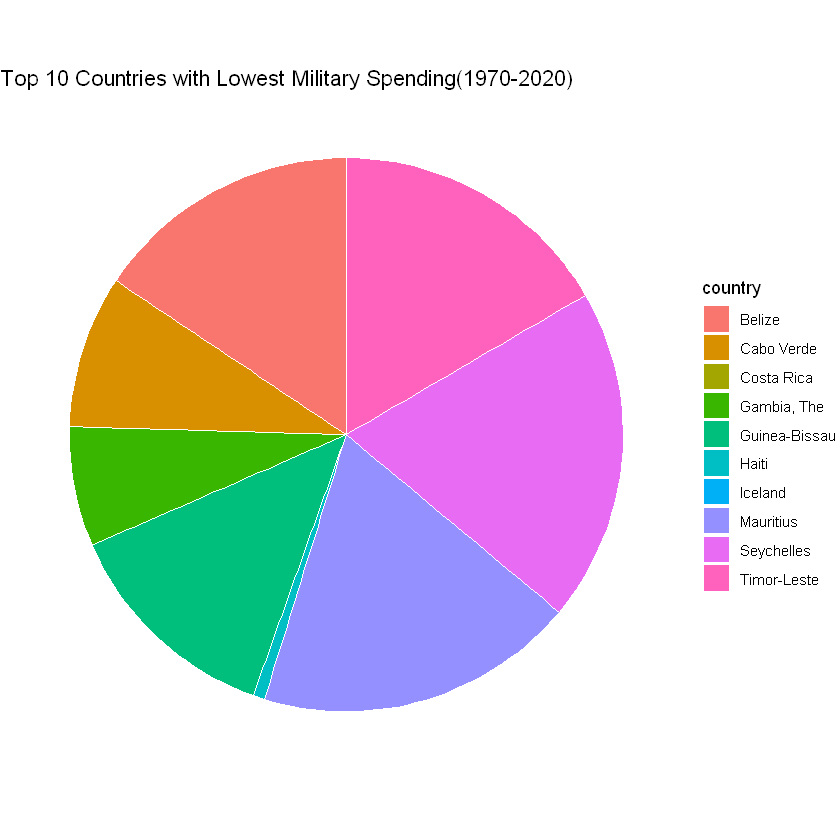

In [28]:
# Basic piechart
L_Plot= ggplot(lowest_military_spending, aes(x="", y=Military.expenditure..current.USD., fill=country)) +
  geom_bar(stat="identity", width=1, color="white") +
  coord_polar("y", start=0) +
  theme_void() # remove background, grid, numeric labels
  
         
L_Plot.labs = L_Plot + labs(title = "Top 10 Countries with Lowest Military Spending(1970-2020)")
L_Plot.labs

In [28]:
d1 = d[!(d$country == 'World' | d$country == 'High income' | d$country == 'OECD members' | d$country == 'Post-demographic dividend' | d$country == 'North America' | d$country == 'IDA & IBRD total' | d$country == 'Low & middle income' | d$country == 'Middle income' | d$country == 'IBRD only' |  d$country == 'Europe & Central Asia' | d$country == 'European Union' | d$country == 'East Asia & Pacific' | d$country == 'Late-demographic dividend' | d$country == 'Upper middle income' | d$country == 'Euro area' | d$country == 'Early-demographic dividend' | d$country == 'Middle East & North Africa' | d$country == 'East Asia & Pacific (excluding high income)' | d$country == 'East Asia & Pacific (IDA & IBRD countries)' | d$country == 'Lower middle income' |  d$country == 'Arab World' | d$country == 'Europe & Central Asia (IDA & IBRD countries)' | d$country =='Europe & Central Asia (excluding high income)' | d$country == 'Latin America & Caribbean' | d$country == 'Latin America & the Caribbean (IDA & IBRD countries)' | d$country == 'South Asia' | d$country == 'South Asia (IDA & IBRD)' | d$country == 'Latin America & Caribbean (excluding high income)' | d$country == 'Middle East & North Africa (excluding high income)' | d$country == 'Middle East & North Africa (IDA & IBRD countries)' | d$country == 'IDA total' | d$country == 'Fragile and conflict affected situations' | d$country == 'Sub-Saharan Africa' | d$country == 'Sub-Saharan Africa (IDA & IBRD countries)' | d$country == 'Sub-Saharan Africa (excluding high income)' | d$country == 'IDA only' | d$country == 'Pre-demographic dividend' | d$country == 'Africa Eastern and Southern' | d$country == 'Least developed countries: UN classification' | d$country == 'Central Europe and the Baltics' | d$country == 'IDA blend' | d$country == 'Low income' | d$country == 'Heavily indebted poor countries (HIPC)' | d$country == 'Africa Western and Central' | d$country == 'Small states' | d$country == 'Other small states') ,]

head(d1, 10)

country,year,Military.expenditure..current.USD.,adminregion,incomeLevel
Afghanistan,1970,2939586,South Asia,Low income
Afghanistan,1971,NA,South Asia,Low income
Afghanistan,1972,NA,South Asia,Low income
Afghanistan,1973,3341272,South Asia,Low income
Afghanistan,1974,3581366,South Asia,Low income
Afghanistan,1975,4203665,South Asia,Low income
Afghanistan,1976,5393251,South Asia,Low income
Afghanistan,1977,6127288,South Asia,Low income
Afghanistan,1978,NA,South Asia,Low income
Afghanistan,1979,NA,South Asia,Low income


In [29]:
d2 = select(d1, -adminregion, -incomeLevel,)
head(d2)

country,year,Military.expenditure..current.USD.
Afghanistan,1970,2939586
Afghanistan,1971,NA
Afghanistan,1972,NA
Afghanistan,1973,3341272
Afghanistan,1974,3581366
Afghanistan,1975,4203665


In [30]:
year_1970 = d2 %>% filter(year == 1970)  # for single subset
head(year_1970)

country,year,Military.expenditure..current.USD.
Afghanistan,1970,2939586
Albania,1970,NA
Algeria,1970,98844251
American Samoa,1970,NA
Andorra,1970,NA
Angola,1970,NA


In [31]:
year_wise = split(d2, d2$year)   # for multiple subsets
new_names = c('1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020')
for (i in 1:length(year_wise)) {
  assign(new_names[i], year_wise[[i]])
}

In [32]:
head(`1970`, 10)

,country,year,Military.expenditure..current.USD.
1,Afghanistan,1970,2939586
154,Albania,1970,NA
205,Algeria,1970,98844251
256,American Samoa,1970,NA
307,Andorra,1970,NA
358,Angola,1970,NA
409,Antigua and Barbuda,1970,NA
511,Argentina,1970,445713894
562,Armenia,1970,NA
613,Aruba,1970,NA


In [33]:
head(`2000`, 10)

,country,year,Military.expenditure..current.USD.
31,Afghanistan,2000,NA
184,Albania,2000,45362503
235,Algeria,2000,1881163649
286,American Samoa,2000,NA
337,Andorra,2000,NA
388,Angola,2000,583621334
439,Antigua and Barbuda,2000,NA
541,Argentina,2000,3266633317
592,Armenia,2000,68052142
643,Aruba,2000,NA


Now we can find the military expenditure in each decade ie (1970-1979, 1980-1989, 1990-1999, 2000-2009, 2010-2019)

In [34]:
decade_1970_1979 = rbind(`1970`,`1971`,`1972`,`1973`,`1974`,`1975`,`1976`,`1977`,`1978`,`1979`)
head(decade_1970_1979)

,country,year,Military.expenditure..current.USD.
1,Afghanistan,1970,2939586
154,Albania,1970,NA
205,Algeria,1970,98844251
256,American Samoa,1970,NA
307,Andorra,1970,NA
358,Angola,1970,NA


In [35]:
decade_1970_1979_2 = aggregate(Military.expenditure..current.USD. ~ country, decade_1970_1979, sum)
head(decade_1970_1979_2)

country,Military.expenditure..current.USD.
Afghanistan,25586427
Algeria,3329754752
Angola,847984491
Argentina,17719318564
Australia,21203840920
Austria,5152119757


In [36]:
decade_1970_1979_3 =  arrange(decade_1970_1979_2, -Military.expenditure..current.USD.)
head(decade_1970_1979_3)

country,Military.expenditure..current.USD.
United States,944826148283
Germany,134019470697
United Kingdom,117337903455
Poland,112772265390
France,102545761002
Japan,46907460863


In [37]:
decade_1970_1979_4 = head(decade_1970_1979_3, 10)
head(decade_1970_1979_4)

country,Military.expenditure..current.USD.
United States,944826148283
Germany,134019470697
United Kingdom,117337903455
Poland,112772265390
France,102545761002
Japan,46907460863


### Plotting top 10 countries with highest military spending in each decade

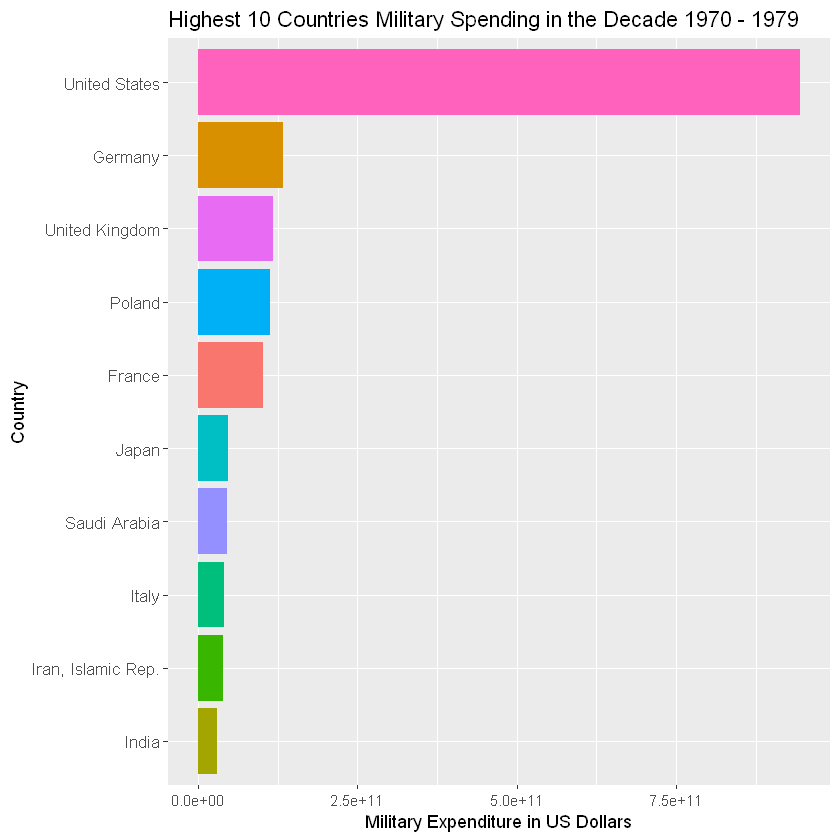

In [38]:
decade_1970_1979_plot  = ggplot(decade_1970_1979_4, aes(x= reorder(country, Military.expenditure..current.USD. ) , y=Military.expenditure..current.USD., fill = country)) +
geom_col()+ ggtitle('Highest 10 Countries Military Spending in the Decade 1970 - 1979') + coord_flip() + 
theme(legend.position = 'None', axis.text.y = element_text(size = 10))


decade_1970_1979_plot.labs = decade_1970_1979_plot + labs(title = "Highest 10 Countries Military Spending in the Decade 1970 - 1979", x = "Country", y = "Military Expenditure in US Dollars")
decade_1970_1979_plot.labs

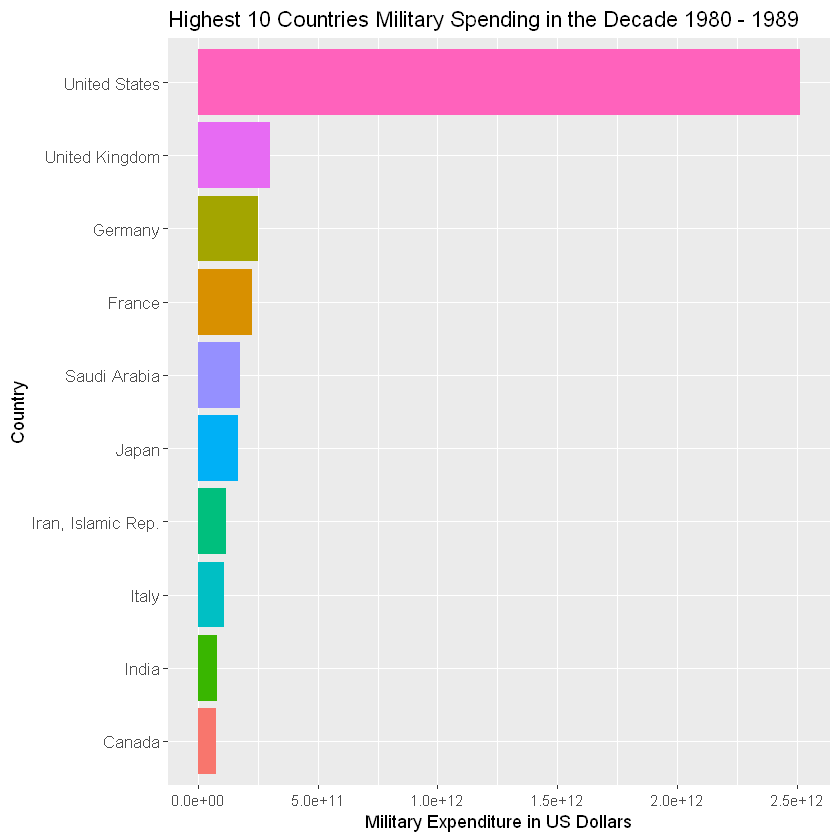

In [39]:
decade_1980_1989 = rbind(`1980`,`1981`,`1982`,`1983`,`1984`,`1985`,`1986`,`1987`,`1988`,`1989`)
decade_1980_1989_2 = aggregate(Military.expenditure..current.USD. ~ country, decade_1980_1989, sum)
decade_1980_1989_3 =  arrange(decade_1980_1989_2, -Military.expenditure..current.USD.)
decade_1980_1989_4 = head(decade_1980_1989_3, 10)


# Bar Plot
decade_1980_1989_plot  = ggplot(decade_1980_1989_4, aes(x= reorder(country, Military.expenditure..current.USD. ) , y=Military.expenditure..current.USD., fill = country)) +
geom_col()+ ggtitle('Highest 10 Countries Military Spending in the Decade 1980 - 1989') + coord_flip() + 
theme(legend.position = 'None', axis.text.y = element_text(size = 10))


decade_1980_1989_plot.labs = decade_1980_1989_plot + labs(title = "Highest 10 Countries Military Spending in the Decade 1980 - 1989", x = "Country", y = "Military Expenditure in US Dollars")
decade_1980_1989_plot.labs

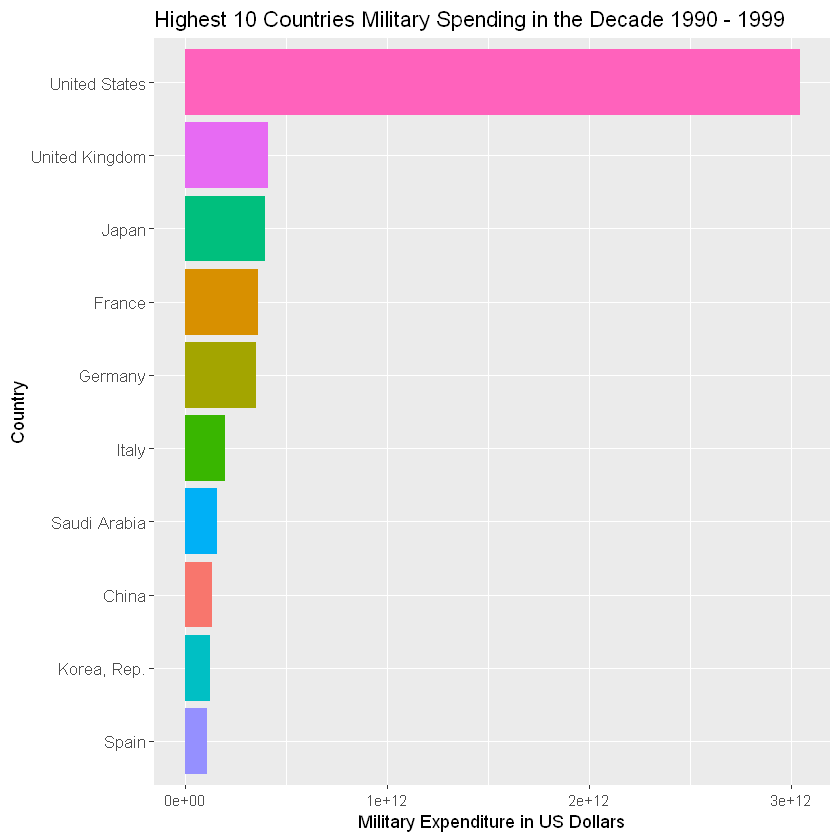

In [40]:
decade_1990_1999 = rbind(`1990`,`1991`,`1992`,`1993`,`1994`,`1995`,`1996`,`1997`,`1998`,`1999`)
decade_1990_1999_2 = aggregate(Military.expenditure..current.USD. ~ country, decade_1990_1999, sum)
decade_1990_1999_3 =  arrange(decade_1990_1999_2, -Military.expenditure..current.USD.)
decade_1990_1999_4 = head(decade_1990_1999_3, 10)


# Bar Plot
decade_1990_1999_plot  = ggplot(decade_1990_1999_4, aes(x= reorder(country, Military.expenditure..current.USD. ) , y=Military.expenditure..current.USD., fill = country)) +
geom_col()+ ggtitle('Highest 10 Countries Military Spending in the Decade 1990 - 1999') + coord_flip() + 
theme(legend.position = 'None', axis.text.y = element_text(size = 10))


decade_1990_1999_plot.labs = decade_1990_1999_plot + labs(title = "Highest 10 Countries Military Spending in the Decade 1990 - 1999", x = "Country", y = "Military Expenditure in US Dollars")
decade_1990_1999_plot.labs

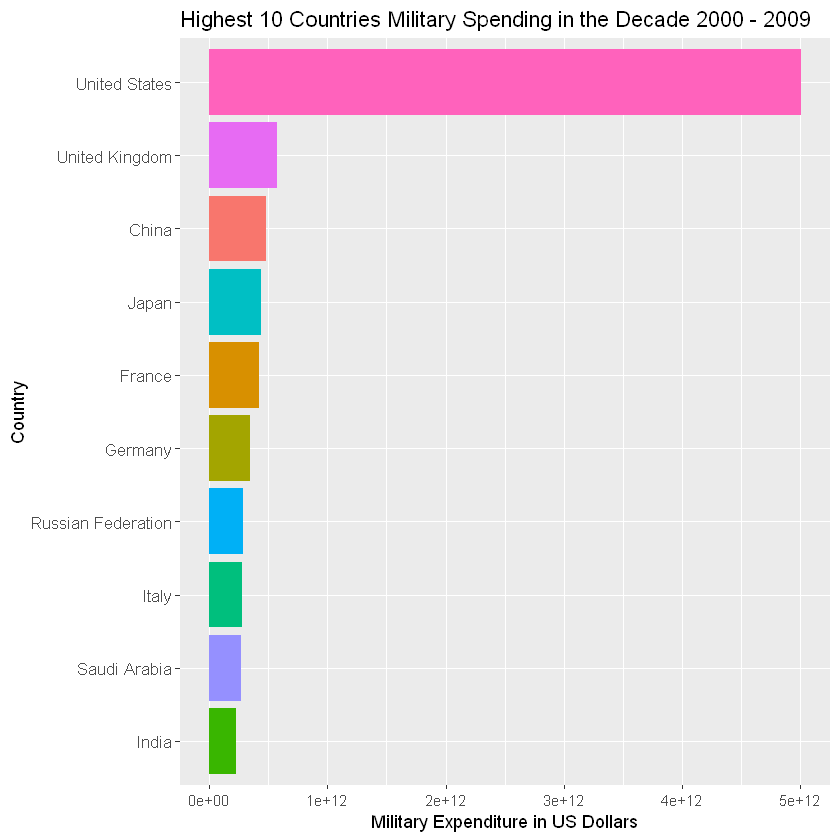

In [41]:
decade_2000_2009 = rbind(`2000`,`2001`,`2002`,`2003`,`2004`,`2005`,`2006`,`2007`,`2008`,`2009`)
decade_2000_2009_2 = aggregate(Military.expenditure..current.USD. ~ country, decade_2000_2009, sum)
decade_2000_2009_3 =  arrange(decade_2000_2009_2, -Military.expenditure..current.USD.)
decade_2000_2009_4 = head(decade_2000_2009_3, 10)


# Bar Plot
decade_2000_2009_plot  = ggplot(decade_2000_2009_4, aes(x= reorder(country, Military.expenditure..current.USD. ) , y=Military.expenditure..current.USD., fill = country)) +
geom_col()+ ggtitle('Highest 10 Countries Military Spending in the Decade 2000 - 2009') + coord_flip() + 
theme(legend.position = 'None', axis.text.y = element_text(size = 10))


decade_2000_2009_plot.labs = decade_2000_2009_plot + labs(title = "Highest 10 Countries Military Spending in the Decade 2000 - 2009", x = "Country", y = "Military Expenditure in US Dollars")
decade_2000_2009_plot.labs

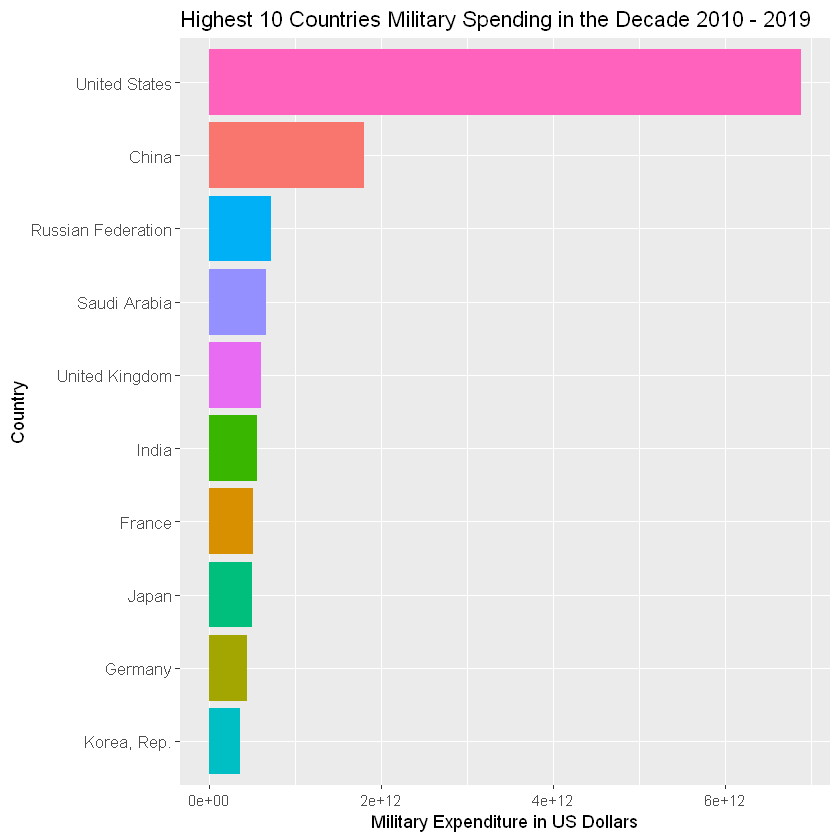

In [42]:
decade_2010_2019 = rbind(`2010`,`2011`,`2012`,`2013`,`2014`,`2015`,`2016`,`2017`,`2018`,`2019`)
decade_2010_2019_2 = aggregate(Military.expenditure..current.USD. ~ country, decade_2010_2019, sum)
decade_2010_2019_3 =  arrange(decade_2010_2019_2, -Military.expenditure..current.USD.)
decade_2010_2019_4 = head(decade_2010_2019_3, 10)


# Bar Plot
decade_2010_2019_plot  = ggplot(decade_2010_2019_4, aes(x= reorder(country, Military.expenditure..current.USD. ) , y=Military.expenditure..current.USD., fill = country)) +
geom_col()+ ggtitle('Highest 10 Countries Military Spending in the Decade 2010 - 2019') + coord_flip() + 
theme(legend.position = 'None', axis.text.y = element_text(size = 10))


decade_2010_2019_plot.labs = decade_2010_2019_plot + labs(title = "Highest 10 Countries Military Spending in the Decade 2010 - 2019", x = "Country", y = "Military Expenditure in US Dollars")
decade_2010_2019_plot.labs

## Conclution

 - United States has always the highest military spending with a very high margin.
 - China has recently increased its military expenditure and hold second highest military spending position in today.
 - Iceland and Costa Rica are the two countries with zero military spending.
 - India is currently in top 10 position as of today.
 - Germany, UK, Russia, Japan, France, Saudi Arabia all have high military spending.